In [ ]:
print ("Hello world!")

Hello world!


### Step 01: **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Step 2: **Load Dataset**

In [ ]:
#Step 02: Dataset read
dataset = pd.read_csv('/content/drive/MyDrive/AML-BUET/Class 01/Data.csv')
dataset.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [ ]:
features = ['Country', 'Age', 'Salary']
label = ['Purchased']

X = dataset[features]
Y = dataset[label]

In [ ]:
X

,Country,Age,Salary
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0
3,Spain,38.0,61000.0
4,Germany,40.0,NaN
5,France,35.0,58000.0
6,Spain,NaN,52000.0
7,France,48.0,79000.0
8,Germany,50.0,83000.0
9,France,37.0,67000.0


In [ ]:
Y

,Purchased
0,No
1,Yes
2,No
3,No
4,Yes
5,Yes
6,No
7,Yes
8,No
9,Yes


check how many missing (NaN) values exist in each column of your dataset.

In [ ]:
dataset.isnull().sum()

,0
Country,0
Age,1
Salary,1
Purchased,0


In [ ]:
dataset.isna().sum() #SAME THING

,0
Country,0
Age,1
Salary,1
Purchased,0


In [ ]:
dataset.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


# Step 3: **Missing values**

# **Indexing by Pandas**

**Positional Indexing** (.iloc)



iloc[rows, cols] as **start:end**
in Python means - start included : end excluded (It's a Pandas expression used to select specific row and columns from a DataFrame.)

In [ ]:
X.iloc[:,0:3]

,Country,Age,Salary
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0
3,Spain,38.0,61000.0
4,Germany,40.0,NaN
5,France,35.0,58000.0
6,Spain,NaN,52000.0
7,France,48.0,79000.0
8,Germany,50.0,83000.0
9,France,37.0,67000.0


In [ ]:
X.iloc[:,1:3]

,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,NaN
5,35.0,58000.0
6,NaN,52000.0
7,48.0,79000.0
8,50.0,83000.0
9,37.0,67000.0


In [ ]:
X.iloc[:,2:3]

,Salary
0,72000.0
1,48000.0
2,54000.0
3,61000.0
4,NaN
5,58000.0
6,52000.0
7,79000.0
8,83000.0
9,67000.0


In [ ]:
X.iloc[0:5,1:3]

,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,NaN


In [ ]:
X.iloc[:,:]

,Country,Age,Salary
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0
3,Spain,38.0,61000.0
4,Germany,40.0,NaN
5,France,35.0,58000.0
6,Spain,NaN,52000.0
7,France,48.0,79000.0
8,Germany,50.0,83000.0
9,France,37.0,67000.0


Replace missing values, encoded as **np.nan**, using the **mean** value

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
imputer = imputer.fit(X.iloc[:, 1:3])
X.iloc[:, 1:3] = imputer.transform(X.iloc[:, 1:3])
X.head()

,Country,Age,Salary
0,France,44.0,72000.000000
1,Spain,27.0,48000.000000
2,Germany,30.0,54000.000000
3,Spain,38.0,61000.000000
4,Germany,40.0,63777.777778


In [ ]:
# split the data
# prepare X and y first
X = iris.drop(['species'], axis=1)
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

# Step 4: Encoding

LabelEncoder convert categorical string values in a column into numeric labels.

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelEncoderX = LabelEncoder()  #Step 1: Create the encoder
X.iloc[:, 0] = labelEncoderX.fit_transform(X.iloc[:, 0])   #Step 2: Fit & transform column 0

In [ ]:
labelEncoderY = LabelEncoder()
Y = labelEncoderY.fit_transform(Y)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
Y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

Another way of label encoding

In [ ]:
for i in label_columns:
    taskdf[i] = lb_encoders[i].transform(taskdf[i])

In [ ]:
taskdf

In [ ]:
LRModel2.predict(taskdf)

### Gender --> Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
lb_x = LabelEncoder()

# Fit the encoder to the Country column (learn the labels)
lb_x.fit(dataset['Country'])

# Transform the Country column and overwrite it with numerical labels
dataset['Country'] = lb_x.transform(dataset['Country'])

# Display the first few rows
dataset.head()

,Country,Age,Salary,Purchased
0,0,44.0,72000.0,No
1,2,27.0,48000.0,Yes
2,1,30.0,54000.0,No
3,2,38.0,61000.0,No
4,1,40.0,NaN,Yes


# Step 5: Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# shape of the entire feature set (rows, columns) before splitting
X.shape

(10, 3)

In [ ]:
#shape of the training subset after splitting
X_train.shape

(8, 3)

In [ ]:
Y_train.shape

(8,)

# Step 6: Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train

array([[-0.90453403, -0.7529426 , -0.62603778],
       [-0.90453403,  1.00845381,  1.01304295],
       [-0.90453403,  1.79129666,  1.83258331],
       [ 0.30151134, -1.73149616, -1.09434656],
       [-0.90453403, -0.36152118,  0.42765698],
       [ 0.30151134,  0.22561096,  0.05040824],
       [ 1.50755672, -0.16581046, -0.27480619],
       [ 1.50755672, -0.01359102, -1.32850095]])

In [ ]:
X_test

array([[-1.,  1.,  1.],
       [ 1., -1., -1.]])

### Decision Tree Classifier using scikit-learn.

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
Y_pred, Y_test

(array([0, 0]), array([0, 1]))

using **confusion_matrix** to evaluate your model's predictions.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred)

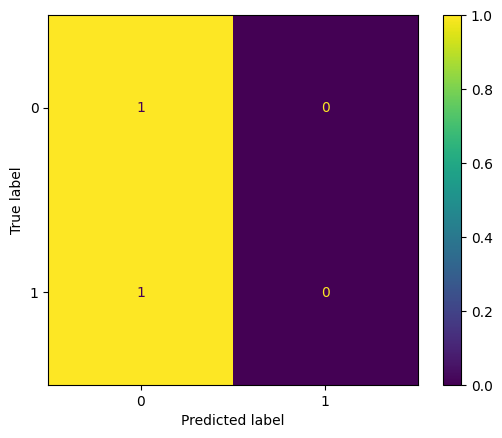

In [ ]:
ConfusionMatrixDisplay(cm).plot()

# Decision Tree

Use **MinMaxScaler** when your model relies on distances or gradients (e.g., *KNN, SVM, Logistic Regression, Neural Networks*) to ensure all features are on the same scale. Don't need to scale Tree-based models (like Decision Trees, Random Forests)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
Y_pred = model.predict(X_test)

## **Evaluation metrics**

Accuracy is used to evaluate your classification model's performance.


*   Accuracy is good when the dataset is balanced (e.g., classes are equally distributed).

*   If the dataset is imbalanced, prefer f1_score, precision, or recall.

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
accuracy_score(Y_test, Y_pred)

0.5

### Confusion matrix

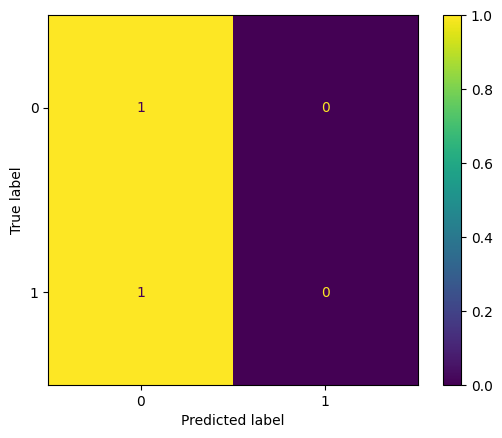

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred)
ConfusionMatrixDisplay(cm).plot()

## Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)


LogisticRegression()

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
accuracy_score(Y_test, Y_pred)

0.0

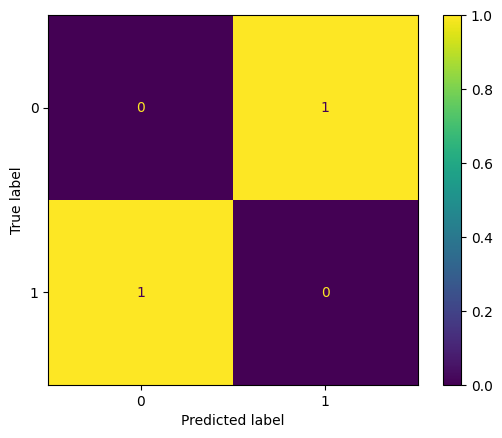

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred)
ConfusionMatrixDisplay(cm).plot()

## K-Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=8)
model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=8)

0.5


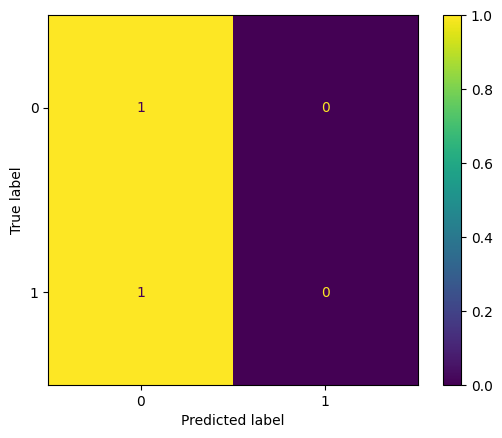

In [ ]:
Y_pred = model.predict(X_test)
print(accuracy_score(Y_test, Y_pred))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred)
ConfusionMatrixDisplay(cm).plot()

### Matplotlib's plotting module

Check age vs salary plot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='Age', ylabel='Salary'>

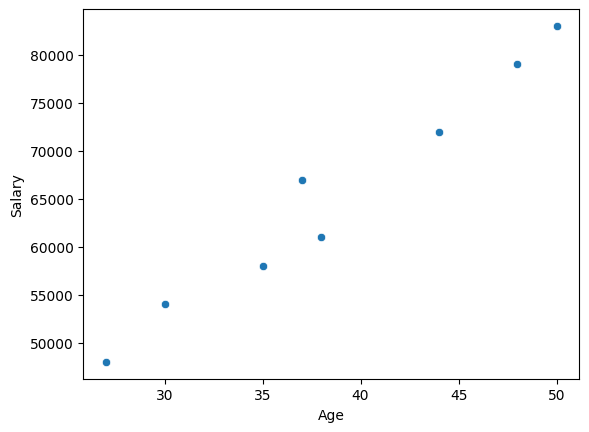

In [ ]:
sns.scatterplot(x='Age', y='Salary', data=dataset)

Check age for salary near the country

<Axes: xlabel='Age', ylabel='Salary'>

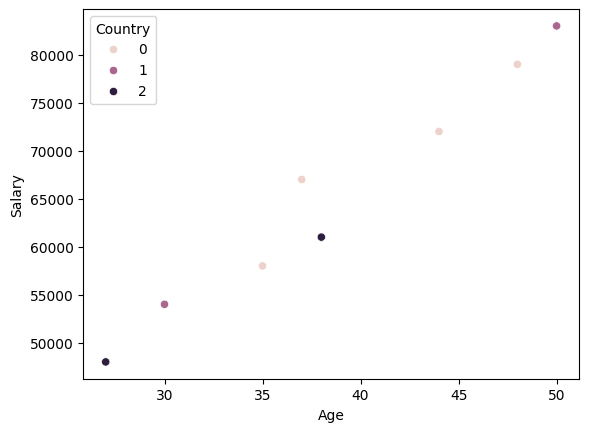

In [ ]:
sns.scatterplot(x='Age', y='Salary', data=dataset, hue='Country')

## Manual Computation of Linear Regression Line

In [ ]:
sx = dataset['Age'].sum().astype(float)
sy = dataset['Salary'].sum().astype(float)
sxy = (dataset['Age'] * dataset['Salary']).sum().astype(float)
sx2 = (dataset['Age'] * dataset['Age']).sum().astype(float)
n = dataset['Age'].size

**Intercept (A)**

In [ ]:
a = (sy*sx2 - sx*sxy) / (n*sx2 - sx*sx)

In [ ]:
a

np.float64(41727.57129563742)

In [ ]:
print(float(a))  # or float(b)

41727.57129563742


**Coefficient (B)**

In [ ]:
b = (n*sxy - sx*sy) / (n*sx2 - sx*sx)

In [ ]:
b

np.float64(449.0667250533691)

Simple linear regression line over a scatterplot of your data.

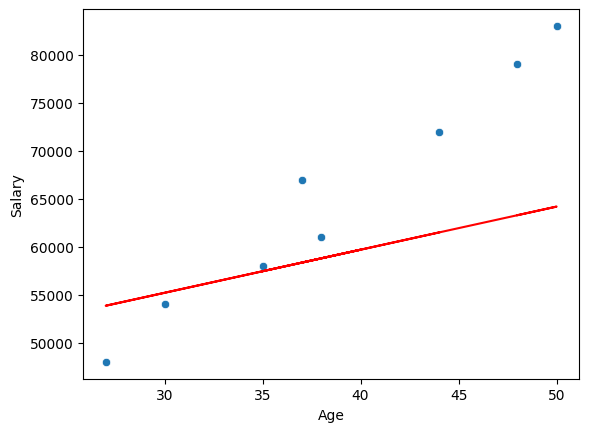

In [ ]:
sns.scatterplot(x='Age', y='Salary', data=dataset);
plt.plot(dataset['Age'], dataset['Age']*b+a, color='r');

### By using SKLearn (use SKLearn library to do all this in 2-3 lines)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LRModel = LinearRegression()

In [ ]:
#if missing valuses (impute)
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
#if missing valuses (impute)
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())
dataset['Salary'] = dataset['Salary'].fillna(dataset['Salary'].mean())

LRModel.fit(dataset[['Age']], dataset['Salary'])

LinearRegression()

Note that, we use ***Age***, as the linear regression model expects a 2D array as the first argument (which is the independent variable X).

In [ ]:
LRModel.coef_

array([1454.84644663])

In [ ]:
LRModel.intercept_

np.float64(7362.065569401711)

In [ ]:
Y_pred = LRModel.predict(X_test[['Age']])
#Y_pred will contain the predicted values corresponding to each 'Age' in the test set.

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
sns.barplot(x=LRModel.coef_, y=X_train.columns)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

R² score evaluation of the linear regression model on the **train** set

In [ ]:
LRModel.score(X_train[['Age']], Y_train)
#evaluation of trained linear regression model by the coefficient of determination (R² score) on the training data.

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

R² score evaluation of the linear regression model on the **test** set

In [ ]:
LRModel.score(X_test[['area']], Y_test)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

*   R² score
*   Mean Absolute Error (MAE)
*   Mean Squared Error (MSE)
*   Root Mean Squared Error (RMSE)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, r2_score

In [ ]:
def eval(model, X_train, Y_train, X_test, Y_test):
    print("The training score is,", model.score(X_train, Y_train), end='\n')
    print("The testing score is,", model.score(X_test, Y_test))

In [ ]:
def metric_score(Y_test, Y_pred):
    print("The mean absolute error is: ", mean_absolute_error(Y_test, Y_pred))
    print("The mean squared error is: ", mean_squared_error(Y_test, Y_pred))
    print("The R2 score is: ", r2_score(Y_test, Y_pred))

In [ ]:
eval(LRModel, X_train[['Age']], Y_train, X_test[['Age']], Y_test)
#print training and testing metrics like R², MAE, MSE, and RMSE for your model on the Age feature.

In [ ]:
metric_score(Y_test, Y_pred)

The mean absolute error is:  0.5
The mean squared error is:  0.5
The R2 score is:  -1.0


## Boxplot

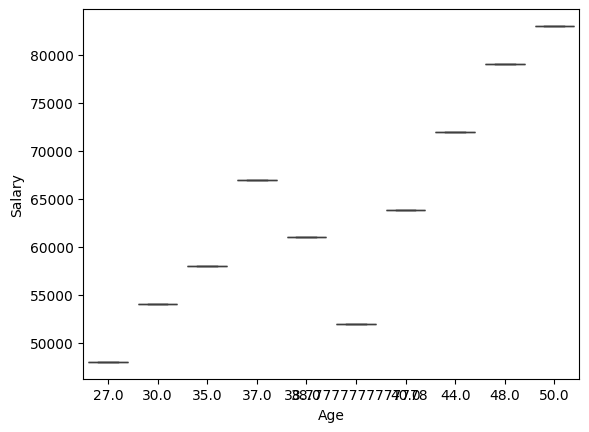

In [ ]:
sns.boxplot(x='Age', y='Salary', data=dataset);
#Age vs Salary

## Violin plot

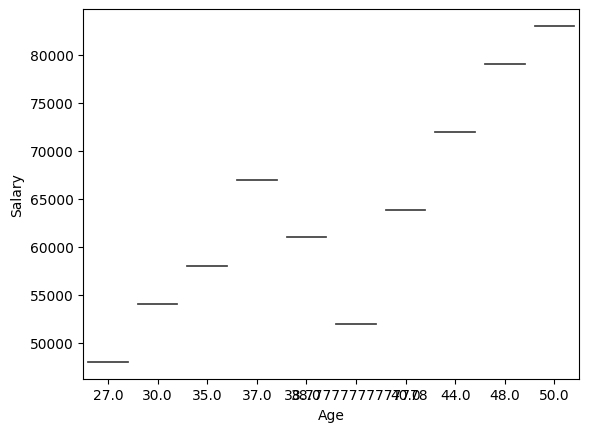

In [ ]:
sns.violinplot(x='Age', y='Salary', data=dataset);

# Regularization

## Lasso (L1) Regularization

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# Import the Lasso model for L1 Regularization
from sklearn.linear_model import Lasso

# Create an instance of the Lasso model
LassoModel = Lasso(alpha=1.0)  # You can change alpha for more/less regularization

# Train the model
LassoModel.fit(X_train, Y_train)


Lasso()

In [ ]:
LassoModel.fit(X_train, Y_train);

In [ ]:
LassoModel.score(X_test, Y_test)

0.0

In [ ]:
eval(LassoModel, X_train, Y_train, X_test, Y_test)

The training score is, 0.0
The testing score is, 0.0


In [ ]:
sns.barplot(LassoModel.coef_, X_train.columns)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
LassoModel.coef_.sum()

np.float64(0.0)

In [ ]:
metric_score(Y_test, LassoModel.predict(X_test))

The mean absolute error is:  0.5
The mean squared error is:  0.25
The R2 score is:  0.0


## Ridge (L2) regularization

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
RidgeModel = Ridge(alpha=10)

In [ ]:
RidgeModel.fit(X_train, Y_train)

In [ ]:
RidgeModel.score(X_test, Y_test)

In [ ]:
eval(RidgeModel, X_train, Y_train, X_test, Y_test)

In [ ]:
sns.barplot(RidgeModel.coef_, X_train.columns)

In [ ]:
RidgeModel.coef_.sum()

In [ ]:
metric_score(Y_test, RidgeModel.predict(X_test))

## ElasticNet (hybrid) regularization

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
ENModel = ElasticNet()

In [ ]:
ENModel.fit(X_train, Y_train)

ElasticNet()

In [ ]:
ENModel.score(X_test, Y_test)

0.0

In [ ]:
eval(ENModel, X_train, Y_train, X_test, Y_test)

The training score is, 0.0
The testing score is, 0.0


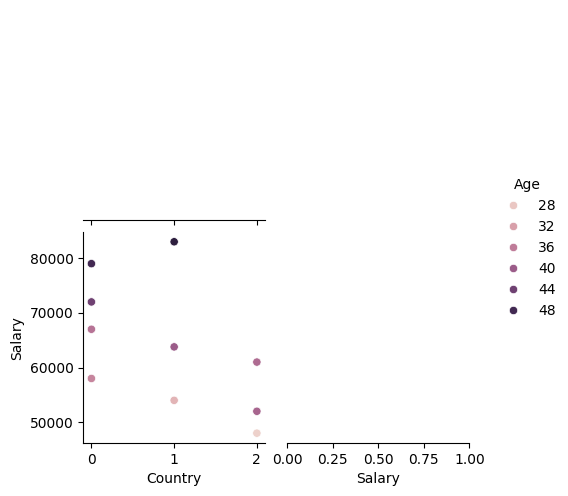

In [ ]:
# make a pairplot, using 'species' as the hue
sns.pairplot(dataset, hue='Age',corner=True)